# **Test Environment** 

# Video process (convert video to images)

In [ ]:
import cv2
vidcap = cv2.VideoCapture('/content/drive/My Drive/test video/guard_in1.mp4')
def getFrame(sec):
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
    hasFrames,image = vidcap.read()
    if hasFrames:
        cv2.imwrite('/content/imagess/'+"image"+str(count)+".jpg", image)     # save frame as JPG file
    return hasFrames
sec = 0
frameRate = 0.5 #//it will capture image in each 0.5 second
count=1
success = getFrame(sec)
while success:
    count = count + 1
    sec = sec + frameRate
    sec = round(sec, 2)
    success = getFrame(sec)

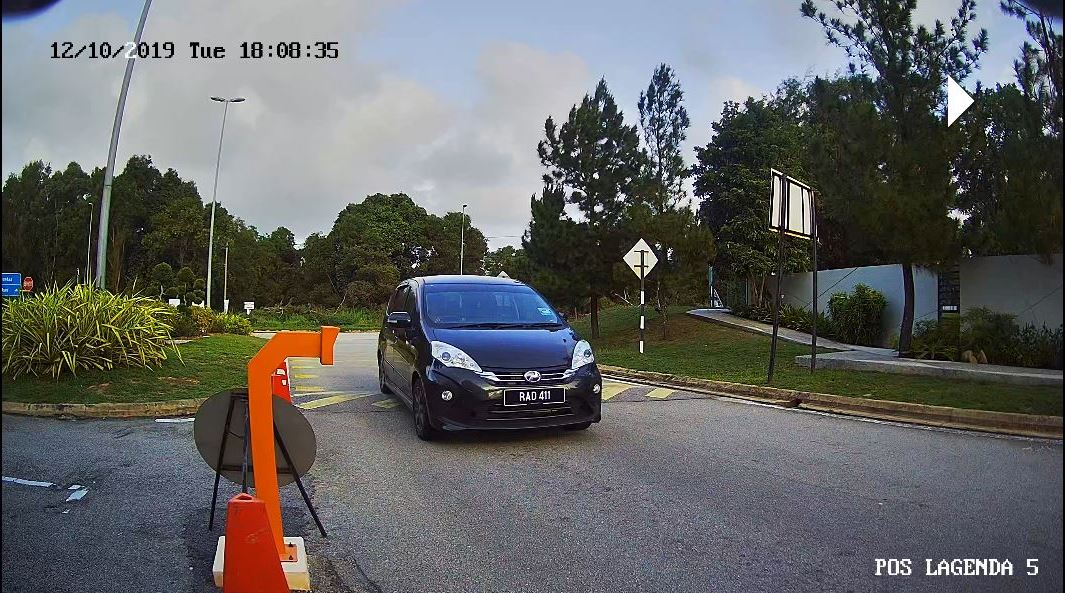

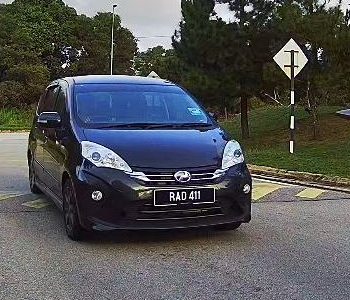

593 1065


In [ ]:
from google.colab.patches import cv2_imshow

import cv2
img = cv2.imread("/content/testImage.JPG")
(H, W) = img.shape[:2]
frame = img[200:500, 350:700]
cv2_imshow(img)
cv2_imshow(frame)
cv2.imwrite("/content/warpimg.jpg", frame)
print(H,W)

# Warping the picture

**Mouse click to find the coordinates**

**Real warping**

In [ ]:
import cv2
import numpy as np
 
img0 = cv2.imread("/content/hilux.JPG")
(H, W) = img0.shape[:2]
pts1 = np.float32([[0,0],[0,H],[W,0],[W,H]])
pts2 = np.float32([[0,0-120],[0-180,H],[W+180,0],[W,H+180]])
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(img0, matrix, (W, H))
cv2.imwrite("/content/testIMGGGhilux.JPG", result)

True

Image enhancement

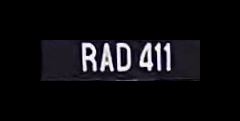

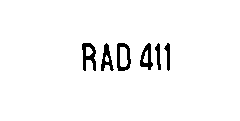

True

In [ ]:
import cv2
import numpy as np
from skimage.io import imread
from skimage.filters import threshold_local
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/license ori.PNG")
img = img[5:48, 0:160]
RGBLOWER = (0, 0, 0)
RGBUPPER = (180, 255, 255)
#imgnww = cv2.GaussianBlur(imgnew, (3,3), 0)
imgnw = cv2.copyMakeBorder(img, 40, 40, 40, 40, cv2.BORDER_CONSTANT)
mask = cv2.inRange(imgnw, RGBLOWER, RGBUPPER)
#img_blur = cv2.medianBlur(self.cropped_img,5).astype('uint8')
#th3 = cv2.adaptiveThreshold(grayImage, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY, 11, 2)
#th1 = cv2.threshold(img_grey, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(imgnw)
cv2_imshow(mask)
cv2.imwrite('/content/newimg1.jpg',mask)
#print(H)
#print(W)

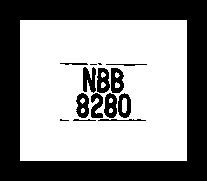

In [ ]:
import pytesseract
import numpy as np
import shutil
import cv2
import os
import random
import imutils
from google.colab.patches import cv2_imshow
try:
 from PIL import Image
except ImportError:
 import Image
import re

img = cv2.imread('/content/warpimages/image(license_plate 0.54).jpg')
imgnww = cv2.copyMakeBorder(img, 20, 20, 20, 20, cv2.BORDER_CONSTANT)
cv2_imshow(imgnww)
text = pytesseract.image_to_string(imgnww)
x = re.findall("^[A-Z]{1,4} [0-9]{1,4}$|^[A-Z]{1,4}\n[0-9]{1,4}$", text)
print(text)

In [ ]:
import re
text= "RAD\n411"
x = re.findall("^[A-Z]{1,4} [0-9]{1,4}$|^[A-Z]{1,4}\n[0-9]{1,4}$", text)
print(x)
if x:
  print("Yes, there is at least one match!")
else:
  print("No match")

['RAD\n411']
Yes, there is at least one match!


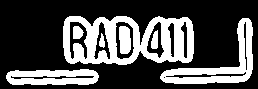

pe 006


In [ ]:
import cv2
import os
import pytesseract
import numpy as np
import shutil
import cv2
import os
import random
import imutils
import numpy as np
from imutils import contours
from google.colab.patches import cv2_imshow


img = cv2.imread("/content/car33.PNG")
mask = np.zeros(img.shape, dtype=np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.copyMakeBorder(img, 10, 10, 10, 10, cv2.BORDER_CONSTANT)
#ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
(thresh,img) = cv2.threshold(img,210,255,cv2.THRESH_BINARY_INV)
img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 17, -2)
text = pytesseract.image_to_string(img)
#mask = cv2.adaptiveThreshold(mask, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, -2)
#mask = cv2.adaptiveThreshold(mask, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 17, -2)
cv2_imshow(img)
print(text)

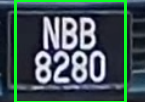

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/car plate test image.PNG")
original = image.copy()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
(thresh,gray) = cv2.threshold(gray,210,255,cv2.THRESH_BINARY_INV)
blur = cv2.GaussianBlur(gray, (3,3), 0)
canny = cv2.Canny(blur, 120, 255, 1)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (9,9))
dilate = cv2.dilate(canny, kernel, iterations=5)
cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
min_area = 4000
image_number = 0
for c in cnts:
    area = cv2.contourArea(c)
    if area > min_area:
        x,y,w,h = cv2.boundingRect(c)
        cv2.rectangle(image, (x, y), (x + w, y + h), (36,255,12), 2)
        ROI = original[y:y+h, x:x+w]
        cv2.imwrite("ROI_{}.png".format(image_number), ROI)
        image_number += 1
      
cv2_imshow(image)

#**Running Main Coding**

Upload the test video

In [ ]:
import shutil, sys
shutil.copy("/content/drive/My Drive/test video/guard_in2.mp4", "/content/warpimages/")
shutil.copy

<function shutil.copy>

Import Pytorch and yolo configuration files

In [1]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.6.0+cu101 _CudaDeviceProperties(name='Tesla K80', major=3, minor=7, total_memory=11441MB, multi_processor_count=13)


In [2]:
!git clone https://github.com/ultralytics/yolov3
%cd yolov3
#!git checkout 267b430

#!mkdir -p weights && cd weights

# copy darknet weight files, continue '-c' if partially downloaded
#!wget -c https://pjreddie.com/media/files/yolov3.weights
#!wget -c https://pjreddie.com/media/files/yolov3-tiny.weights
#!wget -c https://pjreddie.com/media/files/yolov3-spp.weights
#!wget https://pjreddie.com/media/files/yolov3-openimages.weights

Cloning into 'yolov3'...
remote: Enumerating objects: 9437, done.
remote: Total 9437 (delta 0), reused 0 (delta 0), pack-reused 9437
Receiving objects: 100% (9437/9437), 7.82 MiB | 4.64 MiB/s, done.
Resolving deltas: 100% (6469/6469), done.
/content/yolov3


In [3]:
!git clone https://github.com/ThorPham/License-plate-detection.git
%cd License-plate-detection

Cloning into 'License-plate-detection'...
remote: Enumerating objects: 86, done.
remote: Total 86 (delta 0), reused 0 (delta 0), pack-reused 86
Unpacking objects: 100% (86/86), done.
/content/yolov3/License-plate-detection


In [4]:
!gdown https://drive.google.com/uc?id=1ektug-hYnn37m8h5SupAiUYP_D70Sbxw
!pwd
  

Downloading...
From: https://drive.google.com/uc?id=1ektug-hYnn37m8h5SupAiUYP_D70Sbxw
To: /content/yolov3/License-plate-detection/carplate.weights
248MB [00:03, 70.3MB/s]
/content/yolov3/License-plate-detection


In [5]:
%cd /content/yolov3/License-plate-detection

/content/yolov3/License-plate-detection


In [6]:
import shutil, sys  
shutil.copy("/content/drive/My Drive/MODIFIED_CODING/datasets.py","/content/yolov3/License-plate-detection/utils/")
shutil.copy

<function shutil.copy>

In [7]:
import shutil, sys  
shutil.copy("/content/drive/My Drive/MODIFIED_CODING/detect.py","/content/yolov3/License-plate-detection/")
shutil.copy

<function shutil.copy>

In [8]:
import shutil, sys  
shutil.copy("/content/drive/My Drive/MODIFIED_CODING/utils.py","/content/yolov3/License-plate-detection/utils/")
shutil.copy

<function shutil.copy>

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,167 kB/s)
debconf: unable to initi

In [ ]:
#!python3 detect.py --cfg cfg/yolov3-spp.cfg --weights weights/yolov3-spp.weights
#!python3 detect.py --cfg cfg/yolov3-tiny.cfg --weights weights/yolov3-tiny.weights
#!python3 detect.py --cfg cfg/yolov3-spp.cfg --weights weights/yolov3-spp.weights
!python3 detect.py --video /content/warpimages/guard_in2.mp4 --cfg /content/yolov3/License-plate-detection/cfg/yolov3.cfg --weights /content/yolov3/License-plate-detection/carplate.weights --conf-thres 0.1
#Image(filename='output/20191031_120343.jpg', width=600)

Namespace(cfg='/content/yolov3/License-plate-detection/cfg/yolov3.cfg', conf_thres=0.1, img_size=416, nms_thres=0.45, outcome='/content/yolov3/License-plate-detection/output/outcomevideo.mp4', video='/content/warpimages/guard_in2.mp4', weights='/content/yolov3/License-plate-detection/carplate.weights')
Using cuda:0

[INFO] 465 total frame in original video
image 1/465 outcomeimage_0.jpg: 1 license_plates, 126.99 remaining time
image 2/465 outcomeimage_1.jpg: 1 license_plates, 119.53 remaining time
image 3/465 outcomeimage_2.jpg: 1 license_plates, 118.40 remaining time
image 4/465 outcomeimage_3.jpg: 1 license_plates, 123.15 remaining time
image 5/465 outcomeimage_4.jpg: 1 license_plates, 118.36 remaining time
image 6/465 outcomeimage_5.jpg: 1 license_plates, 120.13 remaining time
image 7/465 outcomeimage_6.jpg: 1 license_plates, 117.12 remaining time
image 8/465 outcomeimage_7.jpg: 1 license_plates, 121.45 remaining time
image 9/465 outcomeimage_8.jpg: 1 license_plates, 117.98 remainin


*COMPLETED ALTERED CODING MOVE TO SELECTED FOLDER*

In [ ]:
import shutil, sys  
shutil.copy("/content/yolov3/License-plate-detection/detect.py","/content/drive/My Drive/MODIFIED_CODING/")
shutil.copy

<function shutil.copy>

In [ ]:
import shutil, sys  
shutil.copy("/content/yolov3/License-plate-detection/utils/datasets.py","/content/drive/My Drive/MODIFIED_CODING/")
shutil.copy

<function shutil.copy>

In [ ]:
import shutil, sys  
shutil.copy("/content/yolov3/License-plate-detection/utils/utils.py","/content/drive/My Drive/MODIFIED_CODING/")
shutil.copy

<function shutil.copy>